In [1]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 23.7MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
#imports
import cv2
import json
import os
import pprint
import time
import cv2

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from mlxtend.evaluate import bias_variance_decomp


In [6]:
#retriving bollywood celebrity face data
!unzip /content/drive/MyDrive/bollycelbfacedata.zip

Archive:  /content/drive/MyDrive/bollycelbfacedata.zip
   creating: bollycelbfacedata/
   creating: bollycelbfacedata/Aamir_Khan/
  inflating: bollycelbfacedata/Aamir_Khan/1.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/10.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/100.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/101.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/102.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/103.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/104.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/105.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/106.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/107.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/109.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/11.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/110.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/112.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/113.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/114.jpg  
  inflating: bollycelbfacedata/Aamir_Khan/

In [7]:
# load the image
# Load an color image in grayscale
im = cv2.imread('/content/bollycelbfacedata/Aamir_Khan/1.jpg',0)
print(type(im))

<class 'numpy.ndarray'>


In [8]:
resized_image = cv2.resize(im, (250, 250)) 

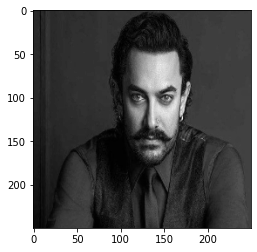

(250, 250)


In [9]:
plt.imshow(resized_image , cmap=plt.get_cmap('gray'))
plt.show()
print(resized_image.shape)

In [11]:
# assigning image and labels variable from dataset

directory = r'/content/bollycelbfacedata/'
images = []
labels = []
d=250*250
for foldername in os.listdir(directory):
    #print(foldername)
    for filename in os.listdir(directory + foldername):
        #print(filename)
        ext=[".jpg",".jpeg"] 
        if filename.endswith(tuple(ext)):
            img = cv2.imread(os.path.join(directory,foldername, filename),0)
            if img is not None:
                resized_im = cv2.resize(img, (250, 250))
                reshape_im = np.reshape(resized_im,(d))
                images.append(reshape_im)
                labels.append(foldername)


In [12]:
data_images = np.asarray(images)
data_images.shape

(1363, 62500)

In [13]:
labels_images = np.asarray(labels)
labels_images.shape

(1363,)

In [14]:
#Pre-Processing Data
from sklearn import preprocessing
data_scaled = preprocessing.scale(data_images)
print(data_scaled.shape)
data_scaled = data_images

(1363, 62500)


In [15]:
#Spilitting data 80:20
from sklearn.model_selection import train_test_split

data_train, data_test,label_train,label_test = train_test_split(data_scaled,labels_images,test_size=0.2, random_state=20)

In [16]:
label_train

array(['Alia_Bhatt', 'Aamir_Khan', 'Alia_Bhatt', ..., 'Alia_Bhatt',
       'Kartik_Aaryan', 'Amitabh_Bachchan'], dtype='<U18')

In [17]:
#converting labels into encoded form
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
label_train_en = LE.fit_transform(label_train)
label_test_en = LE.fit_transform(label_test)

In [19]:
# size of the training data
len(data_train),len(label_train_en)

(1090, 1090)

In [20]:
#size of the testing data
len(data_test),len(label_test)

(273, 273)

In [23]:
#Using the SVM model for bias analysis
from sklearn import  svm, metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [24]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [ ]:
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

In [ ]:
# fitting the model for grid search , it help to find the optimal value of hyperparameters 
grid.fit(data_train, label_train)

In [25]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(C=10,gamma=0.001,kernel='poly')

In [26]:
#fit to the training data
classifier.fit(data_train,label_train_en)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
y_pred = classifier.predict(data_test)

"""**Accuracy**"""

In [28]:
accuracy = accuracy_score(label_test_en,y_pred)
print ("Overall Accuracy:",'{:.3%}'.format(accuracy))

Overall Accuracy: 23.810%


"""**Confusion Matrix**"""

              precision    recall  f1-score   support

           0      0.269     0.250     0.259        28
           1      0.250     0.286     0.267        35
           2      0.077     0.115     0.092        26
           3      0.143     0.138     0.140        29
           4      0.280     0.241     0.259        29
           5      0.238     0.238     0.238        21
           6      0.250     0.190     0.216        21
           7      0.158     0.091     0.115        33
           8      0.484     0.517     0.500        29
           9      0.250     0.318     0.280        22

    accuracy                          0.238       273
   macro avg      0.240     0.239     0.237       273
weighted avg      0.240     0.238     0.237       273



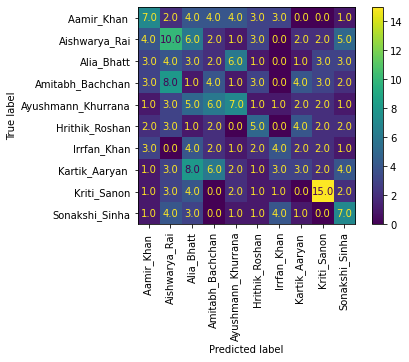

In [29]:
confusion = confusion_matrix(label_test_en, y_pred)

ConfusionMatrixDisplay(confusion,display_labels=["Aamir_Khan ","Aishwarya_Rai", "Alia_Bhatt","Amitabh_Bachchan","Ayushmann_Khurrana","Hrithik_Roshan","Irrfan_Khan","Kartik_Aaryan ","Kriti_Sanon","Sonakshi_Sinha"]).plot(values_format=".1f",xticks_rotation='vertical')

print(metrics.classification_report(label_test_en, y_pred, digits=3))

"""**Class-Wise Accuracy**"""

In [40]:
#Now the normalize the diagonal entries
cm = confusion 
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#The diagonal entries are the accuracies of each class
class_wise_accu = cm.diagonal()

new_lst = [f'{i*100:.1f}%' for i in class_wise_accu]

class_name=["Aamir_Khan ","Aishwarya_Rai", "Alia_Bhatt","Amitabh_Bachchan","Ayushmann_Khurrana","Hrithik_Roshan","Irrfan_Khan","Kartik_Aaryan ","Kriti_Sanon","Sonakshi_Sinha"]
class_accu_df = pd.DataFrame(new_lst,columns = ['Classwise Accuracy'],index = [i for i in class_name])


class_accu_df.style.set_properties(**{'background-color': 'blue',
                           'color': 'white'})

,Classwise Accuracy
Aamir_Khan,25.0%
Aishwarya_Rai,28.6%
Alia_Bhatt,11.5%
Amitabh_Bachchan,13.8%
Ayushmann_Khurrana,24.1%
Hrithik_Roshan,23.8%
Irrfan_Khan,19.0%
Kartik_Aaryan,9.1%
Kriti_Sanon,51.7%
Sonakshi_Sinha,31.8%


"""**Bias Estimation using degree of bias**"""

In [31]:
mse, bias, var = bias_variance_decomp(classifier, data_train, label_train_en, data_test, label_test_en, loss='mse',num_rounds=2, random_seed=1)

print("MSE :",mse,"\n Bias : ", bias,"\nVariance : ",var)

MSE : 14.822344322344323 
 Bias :  12.301282051282051 
Variance :  2.521062271062271
